# Analysis of TCGA dataset 
# Data taken from patient samples of tumor and normal cells
## The cancer type under investigation is clear cell renal carcinoma (kidney cancer)

In [19]:
import pandas as pd
import os
import numpy as np
print("Current working directory" , os.getcwd()) # print out current working directory

Current working directory c:\users\frank\desktop\python_springboard\datasets


### Read in data and print header

In [20]:
os.chdir('c:/users/frank/desktop/python_springboard/datasets')

In [21]:
filename = 'HiSeqV2.csv' # assign dataset to filename object
data = pd.read_csv(filename, sep = ',') # read in csv file as pandas dataframe

In [5]:
data.head() # print head to verify proper formatting 

,sample,TCGA-BP-4162-01,TCGA-CJ-5677-11,TCGA-DV-5566-01,TCGA-BP-5191-01,TCGA-BP-5200-01,TCGA-BP-4347-01,TCGA-BP-4770-01,TCGA-B0-5696-11,TCGA-BP-4762-01,...,TCGA-B0-5104-01,TCGA-A3-3313-01,TCGA-B2-5633-01,TCGA-CJ-4872-01,TCGA-CJ-5684-01,TCGA-CJ-4886-01,TCGA-BP-5009-01,TCGA-BP-4969-01,TCGA-CZ-5461-01,TCGA-CW-5587-01
0,ARHGEF10L,10.5030,10.8969,10.7612,10.2063,10.0616,10.0193,8.4364,11.1427,9.9150,...,10.5586,9.5556,10.2652,9.4981,10.2751,9.9525,10.1273,10.8817,10.1949,10.3294
1,HIF3A,5.5283,6.4943,5.7842,5.0063,5.3326,7.6102,6.0422,5.9789,3.7802,...,6.2061,4.8253,5.1680,8.6195,6.2080,6.3116,6.7446,7.8293,6.1788,6.2293
2,RNF17,3.8036,0.0000,0.0000,0.0000,0.0000,0.3386,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6128,0.0000
3,RNF10,11.4379,12.2130,11.5478,12.3439,11.5149,11.4065,12.1963,12.3946,11.3734,...,11.7338,11.7709,11.4968,11.9561,11.7518,11.5698,12.1565,11.3048,11.5168,11.3489
4,RNF11,11.4180,11.8248,11.3190,10.3413,11.2923,10.9971,11.8936,11.7217,12.2329,...,11.7629,10.2373,11.4637,11.4391,11.3992,11.4937,11.4015,10.8842,11.6230,11.5469


In [22]:
df1 = data.filter(regex = 'sample|11$', axis =1)
# Creating new dataframe with only columns containing expression values for normal cells

In [23]:
df1.shape

(20530, 73)

In [8]:
df1.head()

,sample,TCGA-CJ-5677-11,TCGA-B0-5696-11,TCGA-CJ-5679-11,TCGA-CZ-5452-11,TCGA-B0-5712-11,TCGA-CW-5584-11,TCGA-B0-5701-11,TCGA-CZ-5461-11,TCGA-B0-5690-11,...,TCGA-CW-5580-11,TCGA-B8-5552-11,TCGA-CZ-4865-11,TCGA-CZ-4863-11,TCGA-B2-5636-11,TCGA-CW-6088-11,TCGA-CZ-5982-11,TCGA-CZ-5469-11,TCGA-CJ-5678-11,TCGA-CZ-5451-11
0,ARHGEF10L,10.8969,11.1427,10.3362,10.9979,10.6467,10.6163,10.6772,10.5352,10.9610,...,10.8603,9.4288,10.3868,10.2874,10.9476,10.8848,10.7783,10.3262,10.4025,10.9598
1,HIF3A,6.4943,5.9789,6.0228,7.8769,8.5452,5.1819,8.6367,4.9484,7.1702,...,8.3424,5.5908,7.9224,7.5603,6.4780,8.5598,6.5021,6.9556,5.5893,6.8364
2,RNF17,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5994,2.2604,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.4795
3,RNF10,12.2130,12.3946,12.3002,12.4976,12.1206,12.1293,12.1640,12.2868,12.2738,...,12.4214,11.3729,11.9933,11.9568,12.1550,12.4600,12.0911,12.3941,12.0396,12.2514
4,RNF11,11.8248,11.7217,12.0602,11.6335,11.8102,11.6994,11.5128,11.9681,11.5019,...,11.6284,12.6320,11.9769,11.9774,11.6255,11.4753,11.9079,11.7476,11.9066,11.7847


### Examine mean for each patient sample in both cancer and normal cells

In [9]:
df1.mean() # Examine mean for each column (representing individual patient samples)

TCGA-CJ-5677-11    6.558410
TCGA-B0-5696-11    6.521416
TCGA-CJ-5679-11    6.619398
TCGA-CZ-5452-11    6.457381
TCGA-B0-5712-11    6.659116
TCGA-CW-5584-11    6.559257
TCGA-B0-5701-11    6.690863
TCGA-CZ-5461-11    6.562541
TCGA-B0-5690-11    6.493531
TCGA-CZ-5468-11    6.465557
TCGA-CW-6090-11    6.454463
TCGA-B0-5694-11    6.641930
TCGA-CJ-5689-11    6.583034
TCGA-CZ-5985-11    6.442423
TCGA-CZ-5463-11    6.565627
TCGA-CW-5591-11    6.425067
TCGA-CZ-5984-11    6.573041
TCGA-B0-5699-11    6.489805
TCGA-CZ-5988-11    6.493198
TCGA-B0-5691-11    6.632804
TCGA-A3-3387-11    6.491720
TCGA-B8-4619-11    6.532065
TCGA-CW-5585-11    6.475741
TCGA-CZ-5466-11    6.576956
TCGA-CZ-5467-11    6.478388
TCGA-CJ-5672-11    6.551481
TCGA-CZ-5458-11    6.464728
TCGA-CJ-5676-11    6.568190
TCGA-B0-4700-11    6.619571
TCGA-B0-5402-11    6.666491
                     ...   
TCGA-B8-4622-11    6.563821
TCGA-B0-4712-11    6.401238
TCGA-CW-5587-11    6.507610
TCGA-CZ-4864-11    6.577536
TCGA-CJ-6033-11    6

In [10]:
print(df1.describe())

       TCGA-CJ-5677-11  TCGA-B0-5696-11  TCGA-CJ-5679-11  TCGA-CZ-5452-11  \
count     20530.000000     20530.000000     20530.000000     20530.000000   
mean          6.558410         6.521416         6.619398         6.457381   
std           4.000192         4.015780         3.965226         4.050393   
min           0.000000         0.000000         0.000000         0.000000   
25%           2.916500         2.913400         3.137400         2.568300   
50%           7.731250         7.666400         7.796400         7.638300   
75%           9.743000         9.715300         9.738700         9.719575   
max          18.065400        18.235600        17.019600        18.387600   

       TCGA-B0-5712-11  TCGA-CW-5584-11  TCGA-B0-5701-11  TCGA-CZ-5461-11  \
count     20530.000000     20530.000000     20530.000000     20530.000000   
mean          6.659116         6.559257         6.690863         6.562541   
std           3.948375         3.991399         3.941637         3.997090  

### Generate boxplots to confirm normality of df1 and output descriptions and shape

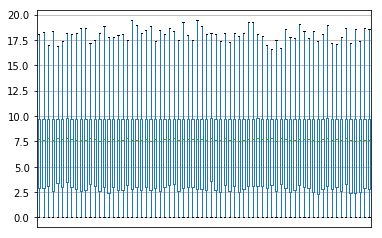

In [29]:
import matplotlib.pyplot as plt

df1_box = df1.boxplot()
df1_box.axes.get_xaxis().set_visible(False)
df1_box


In [26]:
df1_replace = df1.replace(0.0000, np.nan)

In [27]:
df1_dropped = df1_replace.dropna(axis=0, how='any')
df1_dropped.shape

(15499, 73)

## Create df2 and print out head, shape, mean, description, and boxplot

In [13]:
df2 = data.filter(regex = 'sample|01|05$', axis = 1)
# Creating new dataframe with only columns containing expression values for cancer cells

In [14]:
df2.shape

(20530, 536)

In [42]:
df2.head()

,sample,TCGA-BP-4162-01,TCGA-DV-5566-01,TCGA-BP-5191-01,TCGA-BP-5200-01,TCGA-BP-4347-01,TCGA-BP-4770-01,TCGA-BP-4762-01,TCGA-BP-4158-01,TCGA-CJ-4887-01,...,TCGA-B0-5104-01,TCGA-A3-3313-01,TCGA-B2-5633-01,TCGA-CJ-4872-01,TCGA-CJ-5684-01,TCGA-CJ-4886-01,TCGA-BP-5009-01,TCGA-BP-4969-01,TCGA-CZ-5461-01,TCGA-CW-5587-01
0,ARHGEF10L,10.5030,10.7612,10.2063,10.0616,10.0193,8.4364,9.9150,10.7621,10.5819,...,10.5586,9.5556,10.2652,9.4981,10.2751,9.9525,10.1273,10.8817,10.1949,10.3294
1,HIF3A,5.5283,5.7842,5.0063,5.3326,7.6102,6.0422,3.7802,7.2039,6.1342,...,6.2061,4.8253,5.1680,8.6195,6.2080,6.3116,6.7446,7.8293,6.1788,6.2293
2,RNF17,3.8036,0.0000,0.0000,0.0000,0.3386,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6128,0.0000
3,RNF10,11.4379,11.5478,12.3439,11.5149,11.4065,12.1963,11.3734,11.3251,11.7681,...,11.7338,11.7709,11.4968,11.9561,11.7518,11.5698,12.1565,11.3048,11.5168,11.3489
4,RNF11,11.4180,11.3190,10.3413,11.2923,10.9971,11.8936,12.2329,11.2993,10.8723,...,11.7629,10.2373,11.4637,11.4391,11.3992,11.4937,11.4015,10.8842,11.6230,11.5469


In [43]:
df2.mean()

TCGA-BP-4162-01    6.409093
TCGA-DV-5566-01    6.454942
TCGA-BP-5191-01    6.560432
TCGA-BP-5200-01    6.416196
TCGA-BP-4347-01    6.492994
TCGA-BP-4770-01    6.406728
TCGA-BP-4762-01    6.512883
TCGA-BP-4158-01    6.468383
TCGA-CJ-4887-01    6.496647
TCGA-B2-4098-01    6.476365
TCGA-CJ-5676-01    6.440884
TCGA-A3-3370-01    6.585876
TCGA-B0-5102-01    6.430371
TCGA-B0-5701-01    6.358647
TCGA-CJ-4905-01    6.354063
TCGA-CJ-5682-01    6.421132
TCGA-AK-3428-01    6.146289
TCGA-BP-4760-01    6.379697
TCGA-B4-5378-01    6.430757
TCGA-B8-4153-01    6.387356
TCGA-CJ-6028-01    6.473963
TCGA-DV-A4VX-01    6.447581
TCGA-BP-4325-01    6.441525
TCGA-CJ-5689-01    6.592410
TCGA-B0-5701-11    6.690863
TCGA-B0-4691-01    6.754645
TCGA-B0-4815-01    6.716985
TCGA-BP-5004-01    6.424515
TCGA-B0-5402-01    6.443584
TCGA-CZ-5453-01    6.318082
                     ...   
TCGA-CJ-4882-01    7.038987
TCGA-B8-4146-01    6.003716
TCGA-CJ-5679-01    6.482962
TCGA-B0-5709-01    6.553476
TCGA-B2-4102-01    6

In [44]:
print(df2.describe())

       TCGA-BP-4162-01  TCGA-DV-5566-01  TCGA-BP-5191-01  TCGA-BP-5200-01  \
count     20530.000000     20530.000000     20530.000000     20530.000000   
mean          6.409093         6.454942         6.560432         6.416196   
std           4.083991         4.041769         4.034474         4.094334   
min           0.000000         0.000000         0.000000         0.000000   
25%           2.451600         2.725800         3.042900         2.360875   
50%           7.636400         7.617350         7.686100         7.611900   
75%           9.705900         9.699375         9.676675         9.692350   
max          17.165200        16.990900        18.766000        16.852200   

       TCGA-BP-4347-01  TCGA-BP-4770-01  TCGA-BP-4762-01  TCGA-BP-4158-01  \
count     20530.000000     20530.000000     20530.000000     20530.000000   
mean          6.492994         6.406728         6.512883         6.468383   
std           4.055617         4.124523         4.057506         4.051006  

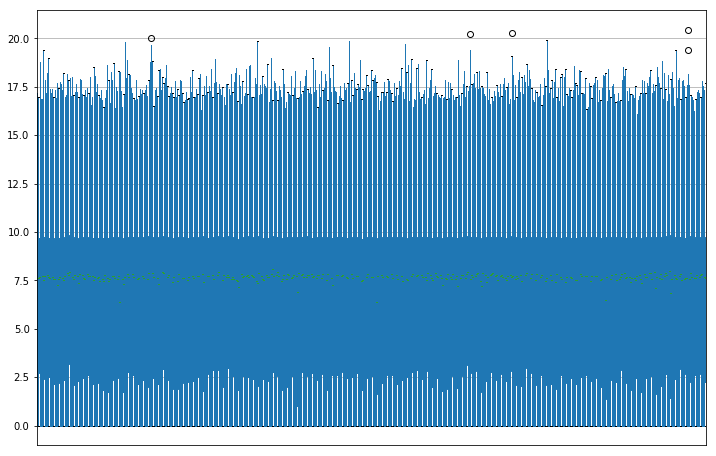

In [77]:
df2_box = df2.boxplot(figsize=(12,8)) # Increase size of boxplot for greater clarity
df2_box.axes.get_xaxis().set_visible(False)
df2_box


## Filter out rows with zero values

In [15]:
df2_replace = df2.replace(0.0000, np.nan)

In [16]:
df2_dropped = df2_replace.dropna(axis=0, how='any')
df2_dropped.shape

(12619, 536)

In [28]:
df1_set = df1_dropped.set_index('sample')
df1_set.head()

,TCGA-CJ-5677-11,TCGA-B0-5696-11,TCGA-CJ-5679-11,TCGA-CZ-5452-11,TCGA-B0-5712-11,TCGA-CW-5584-11,TCGA-B0-5701-11,TCGA-CZ-5461-11,TCGA-B0-5690-11,TCGA-CZ-5468-11,...,TCGA-CW-5580-11,TCGA-B8-5552-11,TCGA-CZ-4865-11,TCGA-CZ-4863-11,TCGA-B2-5636-11,TCGA-CW-6088-11,TCGA-CZ-5982-11,TCGA-CZ-5469-11,TCGA-CJ-5678-11,TCGA-CZ-5451-11
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,10.8969,11.1427,10.3362,10.9979,10.6467,10.6163,10.6772,10.5352,10.9610,10.8893,...,10.8603,9.4288,10.3868,10.2874,10.9476,10.8848,10.7783,10.3262,10.4025,10.9598
HIF3A,6.4943,5.9789,6.0228,7.8769,8.5452,5.1819,8.6367,4.9484,7.1702,7.2163,...,8.3424,5.5908,7.9224,7.5603,6.4780,8.5598,6.5021,6.9556,5.5893,6.8364
RNF10,12.2130,12.3946,12.3002,12.4976,12.1206,12.1293,12.1640,12.2868,12.2738,12.2829,...,12.4214,11.3729,11.9933,11.9568,12.1550,12.4600,12.0911,12.3941,12.0396,12.2514
RNF11,11.8248,11.7217,12.0602,11.6335,11.8102,11.6994,11.5128,11.9681,11.5019,11.7200,...,11.6284,12.6320,11.9769,11.9774,11.6255,11.4753,11.9079,11.7476,11.9066,11.7847
RNF13,10.7779,10.8412,10.8172,10.9679,10.7033,10.6184,10.7271,11.0801,10.9754,10.7149,...,11.0227,11.2715,11.0244,10.7831,10.8893,10.9174,10.8537,10.6932,11.0341,10.9808


In [49]:
df2_set = df2_dropped.set_index('sample')
df2_set.head()

,TCGA-BP-4162-01,TCGA-DV-5566-01,TCGA-BP-5191-01,TCGA-BP-5200-01,TCGA-BP-4347-01,TCGA-BP-4770-01,TCGA-BP-4762-01,TCGA-BP-4158-01,TCGA-CJ-4887-01,TCGA-B2-4098-01,...,TCGA-B0-5104-01,TCGA-A3-3313-01,TCGA-B2-5633-01,TCGA-CJ-4872-01,TCGA-CJ-5684-01,TCGA-CJ-4886-01,TCGA-BP-5009-01,TCGA-BP-4969-01,TCGA-CZ-5461-01,TCGA-CW-5587-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,10.5030,10.7612,10.2063,10.0616,10.0193,8.4364,9.9150,10.7621,10.5819,9.9260,...,10.5586,9.5556,10.2652,9.4981,10.2751,9.9525,10.1273,10.8817,10.1949,10.3294
HIF3A,5.5283,5.7842,5.0063,5.3326,7.6102,6.0422,3.7802,7.2039,6.1342,1.9065,...,6.2061,4.8253,5.1680,8.6195,6.2080,6.3116,6.7446,7.8293,6.1788,6.2293
RNF10,11.4379,11.5478,12.3439,11.5149,11.4065,12.1963,11.3734,11.3251,11.7681,11.7520,...,11.7338,11.7709,11.4968,11.9561,11.7518,11.5698,12.1565,11.3048,11.5168,11.3489
RNF11,11.4180,11.3190,10.3413,11.2923,10.9971,11.8936,12.2329,11.2993,10.8723,10.4091,...,11.7629,10.2373,11.4637,11.4391,11.3992,11.4937,11.4015,10.8842,11.6230,11.5469
RNF13,11.1265,10.7718,10.4809,10.8360,10.2079,9.7629,11.1625,10.6960,10.8856,11.5110,...,11.2131,11.5131,11.0412,11.1944,10.9735,11.1726,10.9264,10.9815,10.7416,11.0906


### Concantinate the two dataframes

The two datasets, one representing cancer cell gene expression values and the other representing the same for normal cells, 
are concantinated, generating a single dataset with gene expression values grouped by type (i.e. cancer or normal).
This allows for truncating the dataset to include only genes with expression values which are common to both dataframes.


In [30]:
df1_indexed = df1.set_index('sample') # set index for both dataframes
df2_indexed = df2.set_index('sample')

result = pd.concat([df1_indexed, df2_indexed], axis=1, sort=True)
result.head()

,TCGA-CJ-5677-11,TCGA-B0-5696-11,TCGA-CJ-5679-11,TCGA-CZ-5452-11,TCGA-B0-5712-11,TCGA-CW-5584-11,TCGA-B0-5701-11,TCGA-CZ-5461-11,TCGA-B0-5690-11,TCGA-CZ-5468-11,...,TCGA-B0-5104-01,TCGA-A3-3313-01,TCGA-B2-5633-01,TCGA-CJ-4872-01,TCGA-CJ-5684-01,TCGA-CJ-4886-01,TCGA-BP-5009-01,TCGA-BP-4969-01,TCGA-CZ-5461-01,TCGA-CW-5587-01
sample,,,,,,,,,,,,,,,,,,,,,
?|100130426,0.4592,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
?|100133144,2.0762,1.3492,2.6805,2.5594,1.2316,1.9550,2.6026,0.0000,2.4222,1.2147,...,2.5395,2.9088,3.6467,0.8257,1.3738,0.9240,3.6702,2.9545,3.1921,2.2017
?|100134869,2.1155,2.2513,2.6584,3.4460,1.7763,2.0690,2.5014,2.7368,1.8210,2.8378,...,3.1575,3.8213,2.5803,2.8430,1.3960,2.2102,2.5326,2.6649,2.7269,1.2909
?|10357,6.2899,6.4364,6.5385,5.7056,6.2582,6.2133,6.2752,6.4366,6.1099,6.1051,...,6.1754,5.9929,6.0802,7.2063,6.3599,6.5732,6.7493,6.4211,6.4675,6.2001
?|10431,9.7313,9.6784,9.6102,9.6400,9.5909,9.9292,9.3162,9.9385,9.4461,9.5091,...,9.4442,9.9426,8.5777,9.2330,9.3462,9.0814,9.6374,9.7207,9.2642,9.1709


In [31]:
result_rep = result.replace(0.0000, np.nan)
result_drop = result_rep.dropna(axis=0, how='any')
result_drop.shape

(12580, 607)

In [52]:
result_drop

,TCGA-CJ-5677-11,TCGA-B0-5696-11,TCGA-CJ-5679-11,TCGA-CZ-5452-11,TCGA-B0-5712-11,TCGA-CW-5584-11,TCGA-B0-5701-11,TCGA-CZ-5461-11,TCGA-B0-5690-11,TCGA-CZ-5468-11,...,TCGA-B0-5104-01,TCGA-A3-3313-01,TCGA-B2-5633-01,TCGA-CJ-4872-01,TCGA-CJ-5684-01,TCGA-CJ-4886-01,TCGA-BP-5009-01,TCGA-BP-4969-01,TCGA-CZ-5461-01,TCGA-CW-5587-01
sample,,,,,,,,,,,,,,,,,,,,,
?|10431,9.7313,9.6784,9.6102,9.6400,9.5909,9.9292,9.3162,9.9385,9.4461,9.5091,...,9.4442,9.9426,8.5777,9.2330,9.3462,9.0814,9.6374,9.7207,9.2642,9.1709
?|155060,5.9741,5.6322,6.1000,6.6384,6.2569,5.7280,6.7368,5.6787,5.8718,6.3721,...,7.1306,6.4916,5.8769,7.2146,5.4630,6.2840,9.0769,7.8053,5.6425,5.4282
?|57714,9.7139,9.4001,10.1602,9.6868,8.8456,10.8834,9.9650,8.9802,9.6756,9.7438,...,10.0016,9.8114,11.0708,9.0791,9.1309,9.1385,9.3468,8.9036,10.3330,10.9599
?|8225,9.2710,9.3414,8.8235,8.9563,8.5973,9.4055,9.0780,8.4961,9.4375,9.1534,...,8.8633,9.1281,8.9826,8.9178,9.0706,9.0365,9.5425,9.8456,9.3315,8.9850
A1BG,4.0513,4.8258,4.9000,4.7150,5.1776,4.9178,5.4407,4.1741,4.1393,5.6470,...,4.6096,3.3377,5.7180,6.0920,4.7173,4.5848,5.2822,5.2041,5.0107,6.1023
A2LD1,10.4983,10.4041,8.8324,7.4699,7.0506,7.4403,9.1524,8.5662,10.1065,7.1455,...,5.1581,7.9242,7.1640,6.4924,9.4936,6.4391,6.2223,5.8009,5.3341,5.5888
A2M,14.7225,13.9385,14.7168,14.0805,15.6545,14.7593,15.6362,14.6794,13.7341,15.1349,...,14.5576,13.5631,15.8222,15.7858,15.7318,15.8420,15.0504,14.5200,15.4400,15.3782
A4GALT,10.0433,9.5825,10.0570,8.8317,10.2043,10.4257,9.6608,9.3833,8.9827,10.6408,...,11.0808,8.6288,10.3988,10.0569,10.6275,10.6303,10.1982,10.2790,10.3658,9.8792
AAAS,9.0110,9.1555,8.8623,8.9977,8.9292,9.0543,9.1254,9.1624,9.0979,9.1447,...,9.2058,9.3982,8.9645,9.6504,9.4930,9.0030,9.6476,9.3551,9.4687,8.8198


### Filter out rows with erroneous gene names

In [53]:
results = result_drop.drop(result_drop.index[0:4])

In [54]:
results.head()

,TCGA-CJ-5677-11,TCGA-B0-5696-11,TCGA-CJ-5679-11,TCGA-CZ-5452-11,TCGA-B0-5712-11,TCGA-CW-5584-11,TCGA-B0-5701-11,TCGA-CZ-5461-11,TCGA-B0-5690-11,TCGA-CZ-5468-11,...,TCGA-B0-5104-01,TCGA-A3-3313-01,TCGA-B2-5633-01,TCGA-CJ-4872-01,TCGA-CJ-5684-01,TCGA-CJ-4886-01,TCGA-BP-5009-01,TCGA-BP-4969-01,TCGA-CZ-5461-01,TCGA-CW-5587-01
sample,,,,,,,,,,,,,,,,,,,,,
A1BG,4.0513,4.8258,4.9000,4.7150,5.1776,4.9178,5.4407,4.1741,4.1393,5.6470,...,4.6096,3.3377,5.7180,6.0920,4.7173,4.5848,5.2822,5.2041,5.0107,6.1023
A2LD1,10.4983,10.4041,8.8324,7.4699,7.0506,7.4403,9.1524,8.5662,10.1065,7.1455,...,5.1581,7.9242,7.1640,6.4924,9.4936,6.4391,6.2223,5.8009,5.3341,5.5888
A2M,14.7225,13.9385,14.7168,14.0805,15.6545,14.7593,15.6362,14.6794,13.7341,15.1349,...,14.5576,13.5631,15.8222,15.7858,15.7318,15.8420,15.0504,14.5200,15.4400,15.3782
A4GALT,10.0433,9.5825,10.0570,8.8317,10.2043,10.4257,9.6608,9.3833,8.9827,10.6408,...,11.0808,8.6288,10.3988,10.0569,10.6275,10.6303,10.1982,10.2790,10.3658,9.8792
AAAS,9.0110,9.1555,8.8623,8.9977,8.9292,9.0543,9.1254,9.1624,9.0979,9.1447,...,9.2058,9.3982,8.9645,9.6504,9.4930,9.0030,9.6476,9.3551,9.4687,8.8198


### Explore variability of dataset via PCA


In [66]:
from sklearn.decomposition import PCA
df_pca = results.copy()
pca = PCA(n_components=15)
pca.fit(df_pca.T)
print('explained variance ratio:', pca.explained_variance_ratio_)
print('components shape:', pca.components_.shape)

explained variance ratio: [0.19142098 0.10228017 0.07574987 0.06626947 0.04649576 0.04140612
 0.02647674 0.02048875 0.01969831 0.01718739 0.01237941 0.01149439
 0.00989594 0.00919658 0.00895255]
components shape: (15, 12576)


As shown, the first two components explain ~30% of the variance.

### Create numpy arrays for the initial two dataframes.

In [78]:
# while pandas dataframes are generally compatible with most data analysis operations, 
# numpy arrays are the preferential format for some machine learning operations. 
# This code transforms df1 (pandas dataframe with normal cell expression values) 
# into a numpy array. The array is expressed as tuples with the gene name as the key.
data_array1 = df1.values

In [56]:
data_array1

array([['ARHGEF10L', 10.8969, 11.1427, ..., 10.3262, 10.4025, 10.9598],
       ['HIF3A', 6.4943, 5.9789, ..., 6.9556, 5.5893, 6.8364],
       ['RNF17', 0.0, 0.0, ..., 0.0, 0.0, 1.4795],
       ...,
       ['GSTK1', 11.6819, 11.8056, ..., 11.5879, 11.505, 11.9865],
       ['SELP', 7.9269, 8.4468, ..., 9.6062, 9.5782, 8.4154],
       ['SELS', 9.6189, 9.2858, ..., 9.6687, 9.673, 9.5737]], dtype=object)

In [79]:
# this code transforms df2 (pandas dataframe with cancer cell expression values) into 
# a numpy array (as above).
data_array2 = df2.values

In [80]:
data_array2

array([['ARHGEF10L', 10.503, 10.7612, ..., 10.8817, 10.1949, 10.3294],
       ['HIF3A', 5.5283, 5.7842, ..., 7.8293, 6.1788, 6.2293],
       ['RNF17', 3.8036, 0.0, ..., 0.0, 0.6128, 0.0],
       ...,
       ['GSTK1', 11.6227, 11.8431, ..., 12.6813, 11.5499, 11.7339],
       ['SELP', 7.0732, 6.5214, ..., 7.1322, 8.1205, 7.3263],
       ['SELS', 9.6363, 9.8619, ..., 9.8824, 9.6616, 9.3725]],
      dtype=object)